In [1]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

#importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from glob import glob
from category_encoders import OneHotEncoder
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import make_pipeline

#for Deployment
from ipywidgets import Dropdown, FloatSlider, IntSlider, interact



In [2]:
#cheacking the list of dataset in mexico city
files=glob("/kaggle/input/mexico-city-real-estate-dataset/mexico-city-real-estate-*.csv")

In [3]:
files

['/kaggle/input/mexico-city-real-estate-dataset/mexico-city-real-estate-5.csv',
 '/kaggle/input/mexico-city-real-estate-dataset/mexico-city-real-estate-4.csv',
 '/kaggle/input/mexico-city-real-estate-dataset/mexico-city-real-estate-1.csv',
 '/kaggle/input/mexico-city-real-estate-dataset/mexico-city-real-estate-2.csv',
 '/kaggle/input/mexico-city-real-estate-dataset/mexico-city-real-estate-3.csv']

In [4]:
frames=[]
for file in files:
    df=pd.read_csv(file)
    frames.append(df)

In [5]:
frames[0].shape
#len(frames)
#frames[2].head(3)

(4628, 16)

In [6]:
data=pd.concat(frames, ignore_index=True)

In [7]:
data.shape

(23140, 16)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23140 entries, 0 to 23139
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   operation                   23140 non-null  object 
 1   property_type               23140 non-null  object 
 2   place_with_parent_names     23140 non-null  object 
 3   lat-lon                     20698 non-null  object 
 4   price                       22745 non-null  float64
 5   currency                    22745 non-null  object 
 6   price_aprox_local_currency  22745 non-null  float64
 7   price_aprox_usd             22745 non-null  float64
 8   surface_total_in_m2         8633 non-null   float64
 9   surface_covered_in_m2       22215 non-null  float64
 10  price_usd_per_m2            6012 non-null   float64
 11  price_per_m2                21320 non-null  float64
 12  floor                       1531 non-null   float64
 13  rooms                       621

In [9]:
data.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,operation,property_type,place_with_parent_names,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url
0,sell,house,|Tlalpan|Distrito Federal|México|,"19.2881277,-99.1383849",4890000.0,MXN,4845763.63,257636.90,144.0,254.0,1789.145139,19251.968500,NaN,NaN,NaN,http://tlalpan.properati.com.mx/l5lr_venta_cas...
1,sell,apartment,|Benito Juárez|Distrito Federal|México|,"19.36269,-99.150565",1570000.0,MXN,1556166.19,82737.39,NaN,75.0,NaN,20933.333330,NaN,NaN,NaN,http://benito-juarez.properati.com.mx/raei_ven...
2,sell,apartment,|Benito Juárez|Distrito Federal|México|,"19.39912,-99.141464",2700000.0,MXN,2675574.95,142253.50,NaN,92.0,NaN,29347.826090,NaN,NaN,NaN,http://benito-juarez.properati.com.mx/odmz_ven...
3,sell,apartment,|Tlalpan|Distrito Federal|México|,"19.291345,-99.124312",1370000.0,MXN,1357928.55,72197.60,NaN,62.0,NaN,22096.774190,NaN,NaN,NaN,http://tlalpan.properati.com.mx/r1ho_venta_dep...
4,sell,apartment,|Iztapalapa|Distrito Federal|México|,"19.354987,-99.061709",840400.0,MXN,832797.49,44277.72,NaN,85.0,NaN,9887.058824,NaN,NaN,NaN,http://iztapalapa.properati.com.mx/px1c_venta_...


# **Data Preparation**

In [10]:
# droping variables with high missing values
data.drop(columns=["floor","rooms","expenses",], inplace=True)

In [11]:
data.isnull().sum()

operation                         0
property_type                     0
place_with_parent_names           0
lat-lon                        2442
price                           395
currency                        395
price_aprox_local_currency      395
price_aprox_usd                 395
surface_total_in_m2           14507
surface_covered_in_m2           925
price_usd_per_m2              17128
price_per_m2                   1820
properati_url                     0
dtype: int64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23140 entries, 0 to 23139
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   operation                   23140 non-null  object 
 1   property_type               23140 non-null  object 
 2   place_with_parent_names     23140 non-null  object 
 3   lat-lon                     20698 non-null  object 
 4   price                       22745 non-null  float64
 5   currency                    22745 non-null  object 
 6   price_aprox_local_currency  22745 non-null  float64
 7   price_aprox_usd             22745 non-null  float64
 8   surface_total_in_m2         8633 non-null   float64
 9   surface_covered_in_m2       22215 non-null  float64
 10  price_usd_per_m2            6012 non-null   float64
 11  price_per_m2                21320 non-null  float64
 12  properati_url               23140 non-null  object 
dtypes: float64(7), object(6)
memory

In [13]:
#calliing for only numeric values
numeric= data.select_dtypes(include="number")
numeric

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2
0,4890000.0,4845763.63,257636.90,144.0,254.0,1789.145139,19251.968500
1,1570000.0,1556166.19,82737.39,NaN,75.0,NaN,20933.333330
2,2700000.0,2675574.95,142253.50,NaN,92.0,NaN,29347.826090
3,1370000.0,1357928.55,72197.60,NaN,62.0,NaN,22096.774190
4,840400.0,832797.49,44277.72,NaN,85.0,NaN,9887.058824
...,...,...,...,...,...,...,...
23135,4000000.0,75234000.00,4000000.00,3750.0,2000.0,1066.666667,2000.000000
23136,4200000.0,4162005.63,221283.23,NaN,250.0,NaN,16800.000000
23137,12800000.0,12687215.74,674546.92,330.0,465.0,2044.081576,27526.881720
23138,2800000.0,2775328.27,147557.13,0.0,172.0,NaN,16279.069770


In [14]:
n=numeric.corr()
n

,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2
price,1.000000,0.451955,0.451955,0.062659,-0.003058,0.154149,0.187006
price_aprox_local_currency,0.451955,1.000000,1.000000,0.133640,-0.003014,0.396427,0.074952
price_aprox_usd,0.451955,1.000000,1.000000,0.133640,-0.003014,0.396427,0.074952
surface_total_in_m2,0.062659,0.133640,0.133640,1.000000,0.003146,-0.075477,0.000654
surface_covered_in_m2,-0.003058,-0.003014,-0.003014,0.003146,1.000000,-0.009242,-0.002071
price_usd_per_m2,0.154149,0.396427,0.396427,-0.075477,-0.009242,1.000000,0.075665
price_per_m2,0.187006,0.074952,0.074952,0.000654,-0.002071,0.075665,1.000000


<Axes: >

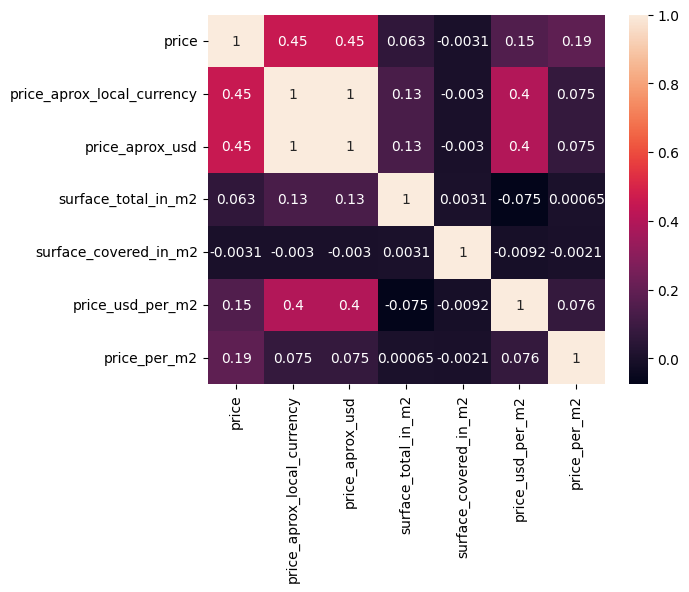

In [15]:
sns.heatmap(n,annot=True)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23140 entries, 0 to 23139
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   operation                   23140 non-null  object 
 1   property_type               23140 non-null  object 
 2   place_with_parent_names     23140 non-null  object 
 3   lat-lon                     20698 non-null  object 
 4   price                       22745 non-null  float64
 5   currency                    22745 non-null  object 
 6   price_aprox_local_currency  22745 non-null  float64
 7   price_aprox_usd             22745 non-null  float64
 8   surface_total_in_m2         8633 non-null   float64
 9   surface_covered_in_m2       22215 non-null  float64
 10  price_usd_per_m2            6012 non-null   float64
 11  price_per_m2                21320 non-null  float64
 12  properati_url               23140 non-null  object 
dtypes: float64(7), object(6)
memory

In [17]:
# droping independent variables with high correlation
data.drop(columns=["price_per_m2","price_usd_per_m2","price_aprox_local_currency","price"],inplace=True)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23140 entries, 0 to 23139
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   operation                23140 non-null  object 
 1   property_type            23140 non-null  object 
 2   place_with_parent_names  23140 non-null  object 
 3   lat-lon                  20698 non-null  object 
 4   currency                 22745 non-null  object 
 5   price_aprox_usd          22745 non-null  float64
 6   surface_total_in_m2      8633 non-null   float64
 7   surface_covered_in_m2    22215 non-null  float64
 8   properati_url            23140 non-null  object 
dtypes: float64(3), object(6)
memory usage: 1.6+ MB


In [19]:
data.drop(columns=["currency","surface_total_in_m2","properati_url"],inplace = True)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23140 entries, 0 to 23139
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   operation                23140 non-null  object 
 1   property_type            23140 non-null  object 
 2   place_with_parent_names  23140 non-null  object 
 3   lat-lon                  20698 non-null  object 
 4   price_aprox_usd          22745 non-null  float64
 5   surface_covered_in_m2    22215 non-null  float64
dtypes: float64(2), object(4)
memory usage: 1.1+ MB


In [21]:
data.head(2)

,operation,property_type,place_with_parent_names,lat-lon,price_aprox_usd,surface_covered_in_m2
0,sell,house,|Tlalpan|Distrito Federal|México|,"19.2881277,-99.1383849",257636.90,254.0
1,sell,apartment,|Benito Juárez|Distrito Federal|México|,"19.36269,-99.150565",82737.39,75.0


In [22]:
#split lat-lon column
data[["lat", "lon"]]= data["lat-lon"].str.split(",",expand = True).astype(float)

In [23]:
data.head(2)

,operation,property_type,place_with_parent_names,lat-lon,price_aprox_usd,surface_covered_in_m2,lat,lon
0,sell,house,|Tlalpan|Distrito Federal|México|,"19.2881277,-99.1383849",257636.90,254.0,19.288128,-99.138385
1,sell,apartment,|Benito Juárez|Distrito Federal|México|,"19.36269,-99.150565",82737.39,75.0,19.362690,-99.150565


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23140 entries, 0 to 23139
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   operation                23140 non-null  object 
 1   property_type            23140 non-null  object 
 2   place_with_parent_names  23140 non-null  object 
 3   lat-lon                  20698 non-null  object 
 4   price_aprox_usd          22745 non-null  float64
 5   surface_covered_in_m2    22215 non-null  float64
 6   lat                      20698 non-null  float64
 7   lon                      20698 non-null  float64
dtypes: float64(4), object(4)
memory usage: 1.4+ MB


In [25]:
# drop lat-lot columns
data.drop(columns="lat-lon", inplace=True)

In [26]:
data.head(2)

,operation,property_type,place_with_parent_names,price_aprox_usd,surface_covered_in_m2,lat,lon
0,sell,house,|Tlalpan|Distrito Federal|México|,257636.90,254.0,19.288128,-99.138385
1,sell,apartment,|Benito Juárez|Distrito Federal|México|,82737.39,75.0,19.362690,-99.150565


In [27]:
#checking number of State
data["place_with_parent_names"].unique()

array(['|Tlalpan|Distrito Federal|México|',
       '|Benito Juárez|Distrito Federal|México|',
       '|Iztapalapa|Distrito Federal|México|',
       '|Álvaro Obregón|Distrito Federal|México|',
       '|Cuajimalpa de Morelos|Distrito Federal|México|',
       '|Benito Juárez|Quintana Roo|México|',
       '|Gustavo A. Madero|Distrito Federal|México|',
       '|Cuauhtémoc|Distrito Federal|México|',
       '|Solidaridad|Quintana Roo|México|',
       '|Azcapotzalco|Distrito Federal|México|',
       '|Venustiano Carranza|Distrito Federal|México|',
       '|Othón P. Blanco|Quintana Roo|México|',
       '|Iztacalco|Distrito Federal|México|',
       '|Miguel Hidalgo|Distrito Federal|México|',
       '|Coyoacán|Distrito Federal|México|',
       '|Tláhuac|Distrito Federal|México|',
       '|Playa del Carmen|Solidaridad|Quintana Roo|México|',
       '|Xochimilco|Distrito Federal|México|',
       '|Zacatecas|Zacatecas|México|', '|Cozumel|Quintana Roo|México|',
       '|Tulum|Quintana Roo|México|',
  

In [28]:
data.shape

(23140, 7)

In [29]:
#Appartment in Distrito federal alone
mask_neighborhood=data["place_with_parent_names"].str.contains("Distrito Federal")
data=data[mask_neighborhood]

In [30]:
data.shape

(18942, 7)

In [31]:
data.head(2)

,operation,property_type,place_with_parent_names,price_aprox_usd,surface_covered_in_m2,lat,lon
0,sell,house,|Tlalpan|Distrito Federal|México|,257636.90,254.0,19.288128,-99.138385
1,sell,apartment,|Benito Juárez|Distrito Federal|México|,82737.39,75.0,19.362690,-99.150565


In [32]:
data["property_type"].unique()

array(['house', 'apartment', 'store', 'PH'], dtype=object)

In [33]:
#only apartment in distrito federal
mask_apartment= data["property_type"].str.contains("apartment")
data=data[mask_apartment]

In [34]:
data.shape

(13433, 7)

In [35]:
data.head()

,operation,property_type,place_with_parent_names,price_aprox_usd,surface_covered_in_m2,lat,lon
1,sell,apartment,|Benito Juárez|Distrito Federal|México|,82737.39,75.0,19.362690,-99.150565
2,sell,apartment,|Benito Juárez|Distrito Federal|México|,142253.50,92.0,19.399120,-99.141464
3,sell,apartment,|Tlalpan|Distrito Federal|México|,72197.60,62.0,19.291345,-99.124312
4,sell,apartment,|Iztapalapa|Distrito Federal|México|,44277.72,85.0,19.354987,-99.061709
6,sell,apartment,|Benito Juárez|Distrito Federal|México|,193497.15,56.0,19.393650,-99.147690


In [36]:
#drop operation is not needed in my model
data.drop(columns="operation",inplace=True)

In [37]:
data.head(2)

,property_type,place_with_parent_names,price_aprox_usd,surface_covered_in_m2,lat,lon
1,apartment,|Benito Juárez|Distrito Federal|México|,82737.39,75.0,19.36269,-99.150565
2,apartment,|Benito Juárez|Distrito Federal|México|,142253.50,92.0,19.39912,-99.141464


In [38]:
data["Neighborhood"]=data["place_with_parent_names"].str.split("|",expand=True)[1]

In [39]:
data.head(2)

,property_type,place_with_parent_names,price_aprox_usd,surface_covered_in_m2,lat,lon,Neighborhood
1,apartment,|Benito Juárez|Distrito Federal|México|,82737.39,75.0,19.36269,-99.150565,Benito Juárez
2,apartment,|Benito Juárez|Distrito Federal|México|,142253.50,92.0,19.39912,-99.141464,Benito Juárez


In [40]:
#drop place_with_parent_names no longer needed
data.drop(columns="place_with_parent_names",inplace=True)

In [41]:
data.head(2)

,property_type,price_aprox_usd,surface_covered_in_m2,lat,lon,Neighborhood
1,apartment,82737.39,75.0,19.36269,-99.150565,Benito Juárez
2,apartment,142253.50,92.0,19.39912,-99.141464,Benito Juárez


In [42]:
data.describe()

,price_aprox_usd,surface_covered_in_m2,lat,lon
count,1.340200e+04,1.278900e+04,12085.000000,12085.000000
mean,2.182381e+05,5.593335e+03,19.492464,-99.236212
std,4.037317e+05,5.818191e+05,0.663689,0.527698
min,7.000000e+03,0.000000e+00,19.194247,-102.552788
25%,5.005215e+04,6.100000e+01,19.365867,-99.189730
50%,9.380045e+04,7.800000e+01,19.394358,-99.162803
75%,2.045542e+05,1.100000e+02,19.434204,-99.139389
max,1.231424e+07,6.574800e+07,41.577487,-90.488467


# **Let cheack for outlier**

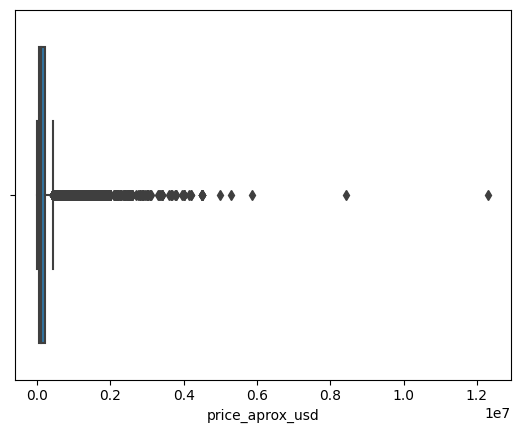

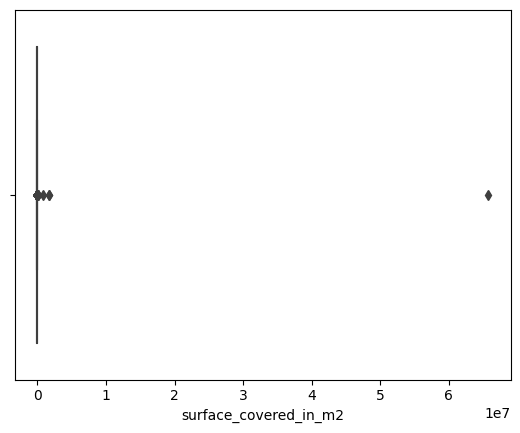

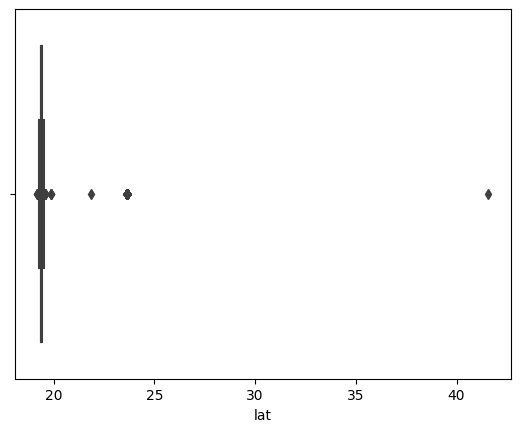

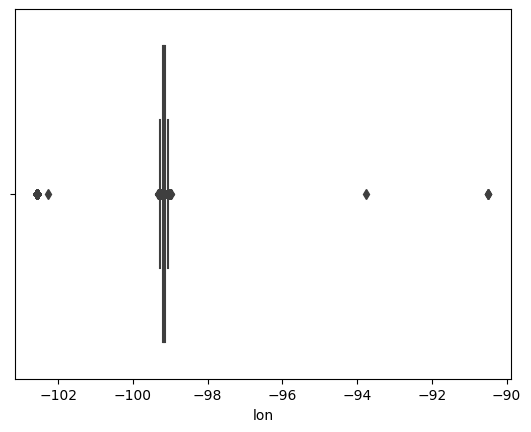

In [43]:
for i in data.select_dtypes("number").columns:
    sns.boxplot(data=data, x=i)
    plt.show()

In [44]:
data.shape

(13433, 6)

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13433 entries, 1 to 23134
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   property_type          13433 non-null  object 
 1   price_aprox_usd        13402 non-null  float64
 2   surface_covered_in_m2  12789 non-null  float64
 3   lat                    12085 non-null  float64
 4   lon                    12085 non-null  float64
 5   Neighborhood           13433 non-null  object 
dtypes: float64(4), object(2)
memory usage: 734.6+ KB


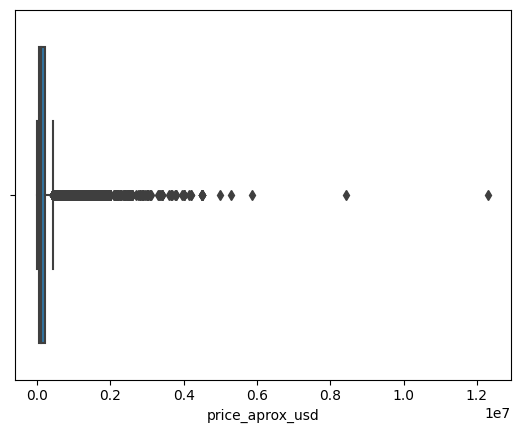

In [46]:
#examine the outlier in Price 
sns.boxplot(data,x=data["price_aprox_usd"])
plt.show()

In [47]:
#drop empty cells
data.dropna(inplace=True)

In [48]:
data.shape

(11514, 6)

In [49]:
data["price_aprox_usd"].sort_values()

7486         7000.00
22573        7823.94
4143         7823.94
12817        7823.94
16484        7823.94
            ...     
1249      4500000.00
19566     4500000.00
4874      5000000.00
10582     8429837.40
2584     12314237.99
Name: price_aprox_usd, Length: 11514, dtype: float64

In [50]:
#limiting the price below
mask_price=data["price_aprox_usd"] < 200_000
data=data[mask_price]


In [51]:
data.shape

(8948, 6)

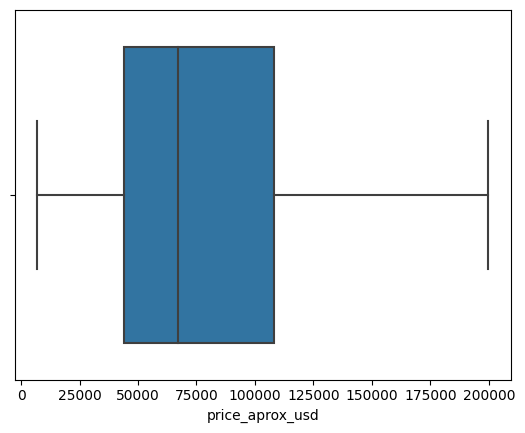

In [52]:
#checking the outlier after reducing the price
sns.boxplot(data,x=data["price_aprox_usd"])
plt.show()

In [53]:
mask_area= data["surface_covered_in_m2"] < 150
data=data[mask_area]

In [54]:
data.shape

(8573, 6)

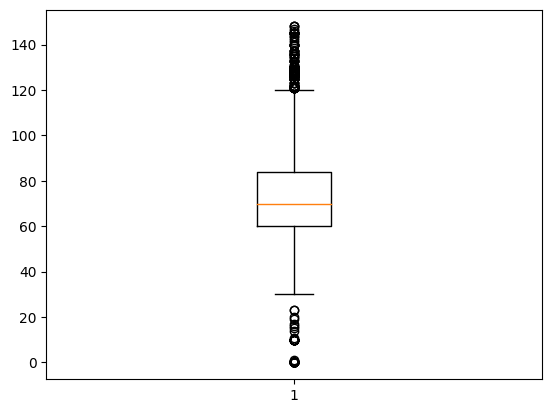

In [55]:
plt.boxplot(data["surface_covered_in_m2"])
plt.show()

In [56]:
data.describe()

,price_aprox_usd,surface_covered_in_m2,lat,lon
count,8573.000000,8573.000000,8573.000000,8573.000000
mean,80098.499678,72.193748,19.469283,-99.205422
std,46160.148625,20.518220,0.596259,0.472256
min,7823.940000,0.000000,19.194247,-102.552788
25%,44151.270000,60.000000,19.365035,-99.181264
50%,65858.100000,70.000000,19.394358,-99.152898
75%,107322.360000,84.000000,19.443178,-99.130180
max,199729.120000,148.000000,41.577487,-90.488467


# **Checking Correlation Using Scatter Plot**

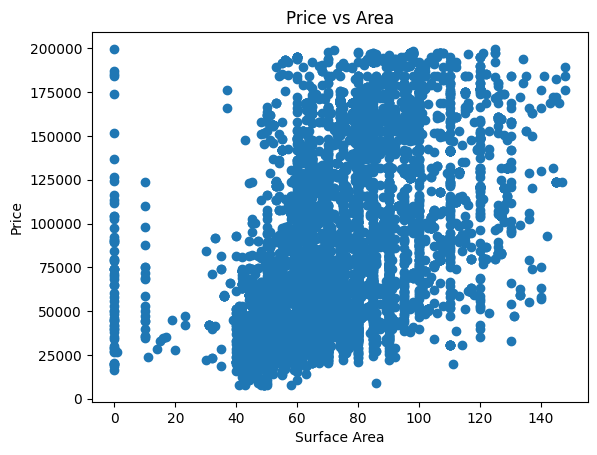

In [57]:
#for i in data.select_dtypes("number").columns:
plt.scatter(data["surface_covered_in_m2"],data["price_aprox_usd"])
plt.title("Price vs Area")
plt.xlabel("Surface Area")
plt.ylabel("Price")
plt.show()

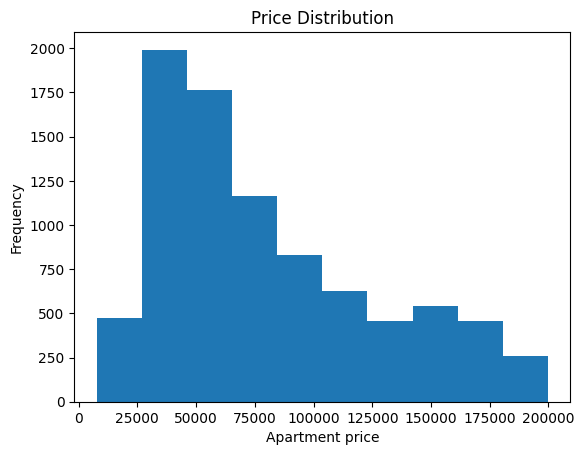

In [58]:
plt.hist(data["price_aprox_usd"])
plt.title("Price Distribution")
plt.ylabel("Frequency")
plt.xlabel("Apartment price")

plt.show()

In [59]:
data.describe()

,price_aprox_usd,surface_covered_in_m2,lat,lon
count,8573.000000,8573.000000,8573.000000,8573.000000
mean,80098.499678,72.193748,19.469283,-99.205422
std,46160.148625,20.518220,0.596259,0.472256
min,7823.940000,0.000000,19.194247,-102.552788
25%,44151.270000,60.000000,19.365035,-99.181264
50%,65858.100000,70.000000,19.394358,-99.152898
75%,107322.360000,84.000000,19.443178,-99.130180
max,199729.120000,148.000000,41.577487,-90.488467


# **Building Linear Regression Model**

# **Split Dataset into Train and Test data**

In [60]:
len(data)

8573

In [61]:
#split dataset 70/30
cut_off=int(len(data)*0.7)
cut_off

6001

In [62]:
#split dataset 70/30
train_data= data[:cut_off]
test_data= data[cut_off:]

In [63]:
train_data.shape

(6001, 6)

In [64]:
test_data.shape

(2572, 6)

In [65]:
#verifying the split
len(train_data) + len(test_data) == len(data)

True

# **Split Train Data into Feature matrix and Target**

In [66]:
feature_matrix=["surface_covered_in_m2","lat","lon","Neighborhood"]
target_matrix="price_aprox_usd"
X_train=train_data[feature_matrix]
y_train=train_data[target_matrix]

In [67]:
X_train.head(3)
#len(X_train)

,surface_covered_in_m2,lat,lon,Neighborhood
1,75.0,19.362690,-99.150565,Benito Juárez
2,92.0,19.399120,-99.141464,Benito Juárez
3,62.0,19.291345,-99.124312,Tlalpan


In [68]:
y_train.head(3)
#len(y_train)

1     82737.39
2    142253.50
3     72197.60
Name: price_aprox_usd, dtype: float64

# **Spliting Test Data into feature mtrix and target matrix**

In [69]:
feature_matrix=["surface_covered_in_m2","lat","lon","Neighborhood"]
target_matrix="price_aprox_usd"
X_test=test_data[feature_matrix]
y_test=test_data[target_matrix]

In [70]:
X_test.head(3)

,surface_covered_in_m2,lat,lon,Neighborhood
16065,97.0,19.400249,-99.177444,Miguel Hidalgo
16069,70.0,19.337950,-99.123458,Coyoacán
16073,120.0,19.428324,-99.176337,Miguel Hidalgo


# **Baseline Model**

In [71]:
#Baseline Model
y_mean= y_train.mean().round(2)
baseline_model=[y_mean]*len(y_train)
print("Mean Price=",y_mean)
print("Baseline model Prediction",baseline_model[:5])

Mean Price= 80812.55
Baseline model Prediction [80812.55, 80812.55, 80812.55, 80812.55, 80812.55]


In [72]:
#absolute mean error for baseline model
baseline_model_mae=mean_absolute_error(baseline_model,y_train).round(2)
print("Mean absolute Error of Baseline_model =",baseline_model_mae) 

Mean absolute Error of Baseline_model = 38547.67


# **Building the model**

In [73]:
#Model building
model= make_pipeline(
    OneHotEncoder(use_cat_names = True),
    Ridge()
)
model

Pipeline(steps=[('onehotencoder', OneHotEncoder(use_cat_names=True)),
                ('ridge', Ridge())])

In [74]:
# Train model
model.fit(X_train,y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['Neighborhood'], use_cat_names=True)),
                ('ridge', Ridge())])

# **Making Prediction on Train Data**

In [75]:
#making prediction on train data
model_pred= model.predict(X_train).round(2)
model_pred_mae= mean_absolute_error(model_pred,y_train)
print("Prediction MAE", model_pred_mae.round(2))
print("Prediction on Train Data", model_pred[:5])



Prediction MAE 29796.44
Prediction on Train Data [104848.01 117983.49  74935.36  62238.55  89391.88]


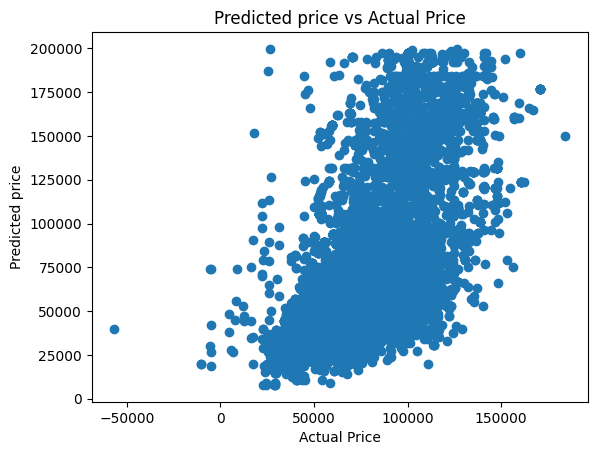

In [76]:
#comparing predicted price against actual price
plt.scatter(model_pred,y_train)
plt.title("Predicted price vs Actual Price")
plt.xlabel("Actual Price")
plt.ylabel("Predicted price")
plt.show()

In [77]:
#obtaining residua
residual= model_pred - y_train
residual[:5]

1     22110.62
2    -24270.01
3      2737.76
4     17960.83
6   -104105.27
Name: price_aprox_usd, dtype: float64

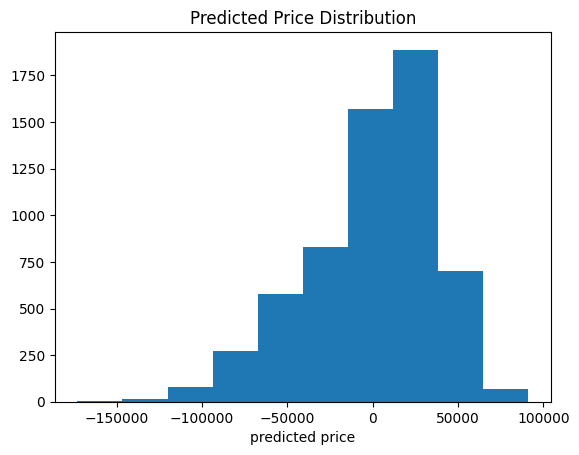

In [78]:
#checking the distribution of Residual
plt.hist(residual)
plt.title("Predicted Price Distribution")
plt.xlabel("predicted price")
plt.show()

# **Making Prediction on Test Data**

In [79]:
X_test.head(3)

,surface_covered_in_m2,lat,lon,Neighborhood
16065,97.0,19.400249,-99.177444,Miguel Hidalgo
16069,70.0,19.337950,-99.123458,Coyoacán
16073,120.0,19.428324,-99.176337,Miguel Hidalgo


In [80]:
model_pred_test = model.predict(X_test)
model_pred_test_mae=mean_absolute_error(model_pred_test, y_test)
print("Prediction on test data MAE:",model_pred_test_mae)
print("Apartment price on test data:",model_pred_test[:5])

Prediction on test data MAE: 29235.5677671239
Apartment price on test data: [100133.14173728  78292.24365152 118235.08644302  60774.13481403
  68905.17574614]


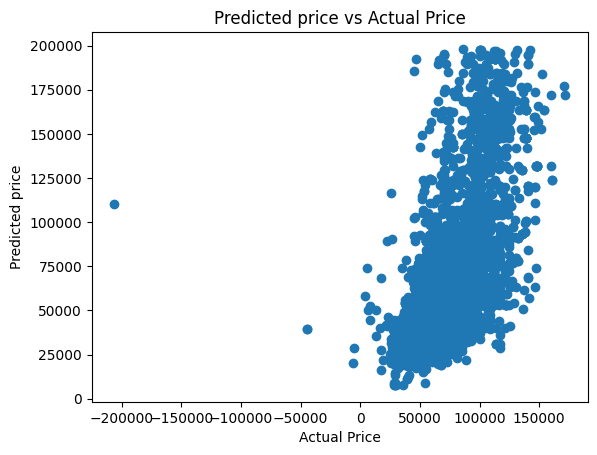

In [81]:
#comparing predicted price against actual price on test data
plt.scatter(model_pred_test,y_test)
plt.title("Predicted price vs Actual Price")
plt.xlabel("Actual Price")
plt.ylabel("Predicted price")
plt.show()

In [82]:
#obtain residual
test_residua = model_pred_test - y_test
test_residua

16065   -97441.168263
16069    34140.973652
16073   -57038.023557
16076    31195.834814
16077      412.755746
             ...     
23113    42505.715694
23124    25020.477226
23127    35214.770583
23128   -53675.856257
23134    -4689.578824
Name: price_aprox_usd, Length: 2572, dtype: float64

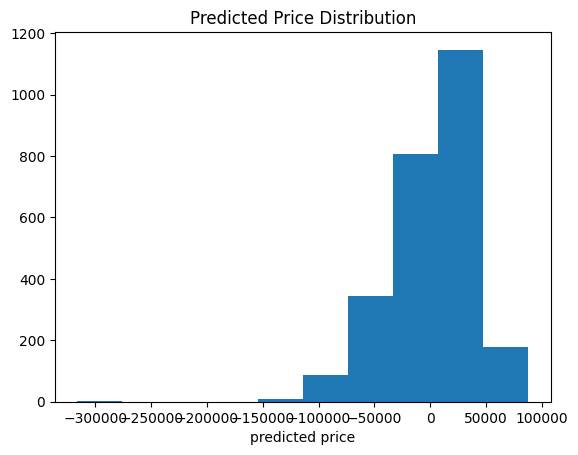

In [83]:
#checking the distribution of Residual
plt.hist(test_residua)
plt.title("Predicted Price Distribution")
plt.xlabel("predicted price")
plt.show()

# **Communication**

In [84]:
# let obtain intercept and conficient for the vriables
intercept = model.named_steps["ridge"].intercept_
coefficients = model.named_steps["ridge"].coef_
print("coefficients len:", len(coefficients))
print(coefficients[:5])  # First five coefficients
print("intercept",intercept)

coefficients len: 18
[   797.85202498  -8314.68962698 -13746.1225205   28387.07126553
   8614.16849158]
intercept -1185319.0215585958


In [85]:
#let obtain the corresponding variable for each coefficient
feature_names = model.named_steps["onehotencoder"].get_feature_names()
print("features len:", len(feature_names))
print(feature_names[:10])  # First five feature names

features len: 18
['surface_covered_in_m2' 'lat' 'lon' 'Neighborhood_Benito Juárez'
 'Neighborhood_Tlalpan' 'Neighborhood_Iztapalapa'
 'Neighborhood_Gustavo A. Madero' 'Neighborhood_Venustiano Carranza'
 'Neighborhood_Álvaro Obregón' 'Neighborhood_Iztacalco']


In [86]:
#let create a panda series consist variable names and it corressponding coefficient
feat_imp = pd.Series(coefficients, index=feature_names)
feat_imp.head()

surface_covered_in_m2           797.852025
lat                           -8314.689627
lon                          -13746.122521
Neighborhood_Benito Juárez    28387.071266
Neighborhood_Tlalpan           8614.168492
dtype: float64

In [87]:
#let write the regression equation
print(f"price = {intercept.round(2)}")
for f, c in feat_imp.items():
    print(f"+ ({round(c, 2)} * {f})")

price = -1185319.02
+ (797.85 * surface_covered_in_m2)
+ (-8314.69 * lat)
+ (-13746.12 * lon)
+ (28387.07 * Neighborhood_Benito Juárez)
+ (8614.17 * Neighborhood_Tlalpan)
+ (-21043.53 * Neighborhood_Iztapalapa)
+ (-9293.1 * Neighborhood_Gustavo A. Madero)
+ (-10972.65 * Neighborhood_Venustiano Carranza)
+ (8877.04 * Neighborhood_Álvaro Obregón)
+ (-10840.26 * Neighborhood_Iztacalco)
+ (6062.27 * Neighborhood_Miguel Hidalgo)
+ (5987.48 * Neighborhood_Coyoacán)
+ (1522.94 * Neighborhood_Cuauhtémoc)
+ (-7761.08 * Neighborhood_Azcapotzalco)
+ (-26097.19 * Neighborhood_Tláhuac)
+ (56323.13 * Neighborhood_Cuajimalpa de Morelos)
+ (-15253.8 * Neighborhood_La Magdalena Contreras)
+ (-14512.5 * Neighborhood_Xochimilco)


Text(0.5, 1.0, 'Important Features for apartment price')

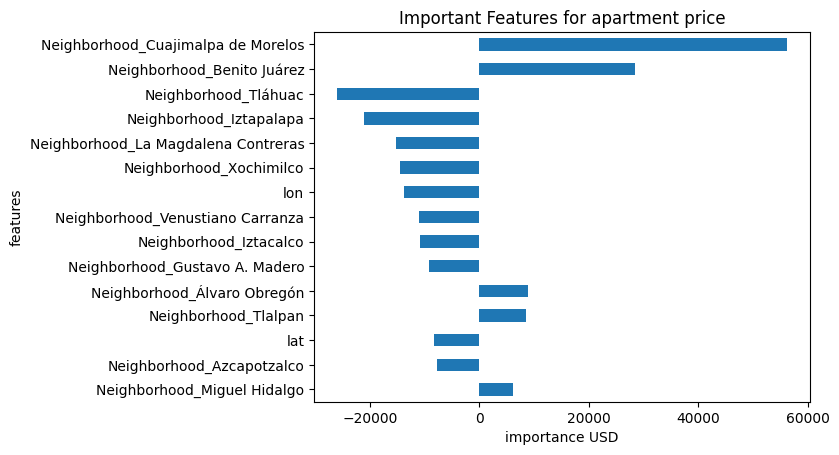

In [88]:
feat_imp.sort_values(key=abs).tail(15).plot(kind="barh")
plt.xlabel("importance USD")
plt.ylabel("features")
plt.title("Important Features for apartment price")

Text(0.5, 1.0, 'Important features for apartment price')

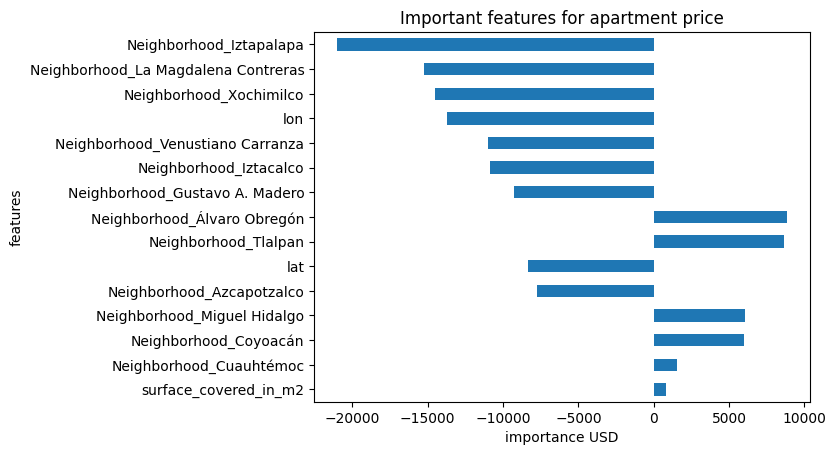

In [89]:
feat_imp.sort_values(key=abs).head(15).plot(kind="barh")
plt.xlabel("importance USD")
plt.ylabel("features")
plt.title("Important features for apartment price")

In [90]:
X_train.head(3)

,surface_covered_in_m2,lat,lon,Neighborhood
1,75.0,19.362690,-99.150565,Benito Juárez
2,92.0,19.399120,-99.141464,Benito Juárez
3,62.0,19.291345,-99.124312,Tlalpan


# **Deployment** 

In [91]:
def make_prediction(area, lat, lon, Neighborhood): #creating a function
    data={                                           #creating a dictionary to accept data from the user
        "surface_covered_in_m2": area,
        "lat": lat,
        "lon":lon,
        "Neighborhood":Neighborhood
    }
   
    file=pd.DataFrame(data, index=[0])                    #changing the data collected to datafram
    prediction = model.predict(file).round(2)[0]
    return f"Predicted apartment price: ${prediction}"

In [92]:
#Input the give the apartment size, lat,lon, and neighborhood
make_prediction(148,19.46, -99.21, "Benito Juárez")

'Predicted apartment price: $163099.1'

In [93]:
interact(
    make_prediction,
    area=IntSlider(
        min=X_train["surface_covered_in_m2"].min(),
        max=X_train["surface_covered_in_m2"].max(),
        value=X_train["surface_covered_in_m2"].mean(),
    ),
    lat=FloatSlider(
        min=X_train["lat"].min(),
        max=X_train["lat"].max(),
        step=0.01,
        value=X_train["lat"].mean(),
    ),
    lon=FloatSlider(
        min=X_train["lon"].min(),
        max=X_train["lon"].max(),
        step=0.01,
value=X_train["lon"].mean(),
    ),
    Neighborhood=Dropdown(options=sorted(X_train["Neighborhood"].unique())),
);

interactive(children=(IntSlider(value=72, description='area', max=148), FloatSlider(value=19.46798657903036, d…